In [32]:
from matplotlib.pyplot import imshow
from matplotlib.pyplot import imread
from matplotlib.pyplot import imsave
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [33]:
import os
import caffe
import numpy as np
import yaml
from PIL import Image
import cPickle
import xml.etree.ElementTree as ET
import sklearn.metrics #for confusion matrix
import math #for view generation
from scipy import misc # for shrec
import scipy.ndimage

In [34]:
import cv2
import numpy as np

In [35]:
images_folder = '/c16/THESE.JORIS/datasets/HandGestureDataset_SHREC2017/gesture_1/finger_1/subject_1/essai_1/'
image_name_0 = '30_depth'
image_name_1 = '31_depth'
extension = 'png'

In [36]:
img_0 = Image.open('{}{}.{}'.format(images_folder,image_name_0,extension))
# img_0 = np.array(img_0, dtype=np.float32)
img_0 = np.array(img_0, dtype=np.uint16)
img_1 = Image.open('{}{}.{}'.format(images_folder,image_name_1,extension))
# img_1 = np.array(img_1  , dtype=np.float32)
img_1 = np.array(img_1  , dtype=np.uint16)

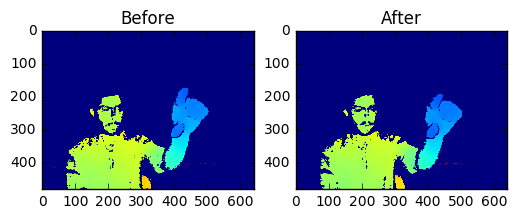

In [37]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img_0)
a.set_title('Before')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(img_1)
a.set_title('After')

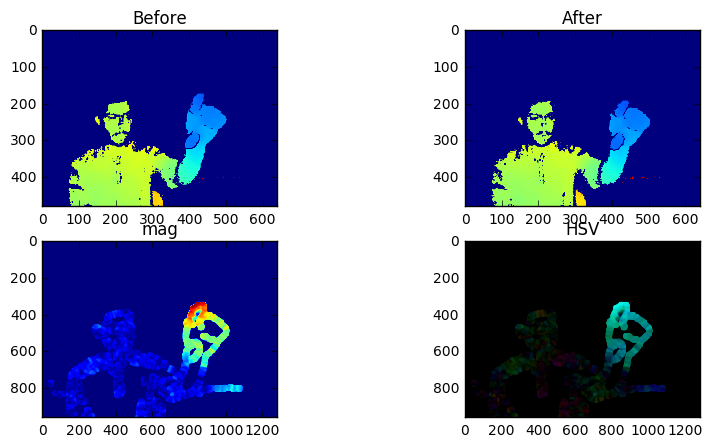

In [38]:
img_0_x2=scipy.ndimage.zoom(img_0, 2)
img_1_x2=scipy.ndimage.zoom(img_1, 2)


hsv = np.zeros([img_0_x2.shape[0],img_0_x2.shape[1],3]).astype(np.uint8)
hsv[...,1] = 255

pyr_scale = 0.9
levels = 0.1
winsize = 10
iterations =30
poly_n = 5
poly_sigma = 1
flags = 1.2
flow = 1


flow = cv2.calcOpticalFlowFarneback(img_0_x2, img_1_x2, pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
# flow = cv2.calcOpticalFlowFarneback(img_0_x2,img_1_x2, None, 0.5, 10, 15, 3, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

fig = plt.figure(figsize=(10,5))
# plt.axis('off')
a=fig.add_subplot(2,2,1)
imgplot = plt.imshow(img_0)
a.set_title('Before')
a=fig.add_subplot(2,2,2)
imgplot = plt.imshow(img_1)
a.set_title('After')
a=fig.add_subplot(2,2,3)
imgplot = plt.imshow(mag)
a.set_title('mag')
a=fig.add_subplot(2,2,4)
imgplot = plt.imshow(rgb)
a.set_title('HSV')


In [39]:
root_datase = '/c16/THESE.JORIS/datasets/HandGestureDataset_SHREC2017/'

idx_gesture = 1
idx_subject = 1
idx_finger = 1
idx_essai = 1
# idx_image = 32


folder_path_canvas = root_datase + 'gesture_{}/finger_{}/subject_{}/essai_{}/'

folder_path = folder_path_canvas.format(idx_gesture,idx_finger,idx_subject,idx_essai) 
skeletons_image_path = folder_path+'skeletons_image.txt'

In [40]:
skeletons_image = np.loadtxt(skeletons_image_path)
depths = np.zeros([skeletons_image.shape[0], 480, 640])
# mags = np.zeros([skeletons_image.shape[0], 480, 640])
# angs = np.zeros([skeletons_image.shape[0], 480, 640])
hsvs = np.zeros([skeletons_image.shape[0], 480, 640,3]).astype(np.uint8)

In [41]:
pyr_scale = 0.9
levels = 0.1
winsize = 500
iterations =10
poly_n = 5
poly_sigma = 1
flags = 1.2
flow = 0

zoom = 2

hsv = np.zeros([zoom*480,zoom*640,3]).astype(np.uint8)
hsv[...,1] = 255

hsvs = np.zeros([skeletons_image.shape[0], zoom*480, zoom*640,3]).astype(np.uint8)

scipy.ndimage.zoom(img_0, 2)

for idx_image in range(0, skeletons_image.shape[0]):
    print "loading :",idx_image,"/", skeletons_image.shape[0]
    depths[idx_image,:] = Image.open(folder_path+str(idx_image)+'_depth.png')
# for idx_image in range(1, skeletons_image.shape[0]):    
#     print "OF :",idx_image,"/", skeletons_image.shape[0]
#     img0_x2 = scipy.ndimage.zoom(depths[idx_image,:],2)
#     img1_x2 = scipy.ndimage.zoom(depths[idx_image-1,:],2)
#     flow = cv2.calcOpticalFlowFarneback(img0_x2,img1_x2, pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
#     # flow = cv2.calcOpticalFlowFarneback(img_0,img_1, None, 0.5, 10, 15, 3, 5, 1.2, 0)
#     mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
# #     mags[idx_image,:] = mag
# #     angs[idx_image,:] = ang
    
#     hsv[...,0] = ang*180/np.pi/2
#     hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
#     rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR) 
#     hsvs[idx_image,...] = rgb #scipy.ndimage.zoom(rgb,[1./zoom,1./zoom,1])

loading : 0 / 95
loading : 1 / 95
loading : 2 / 95
loading : 3 / 95
loading : 4 / 95
loading : 5 / 95
loading : 6 / 95
loading : 7 / 95
loading : 8 / 95
loading : 9 / 95
loading : 10 / 95
loading : 11 / 95
loading : 12 / 95
loading : 13 / 95
loading : 14 / 95
loading : 15 / 95
loading : 16 / 95
loading : 17 / 95
loading : 18 / 95
loading : 19 / 95
loading : 20 / 95
loading : 21 / 95
loading : 22 / 95
loading : 23 / 95
loading : 24 / 95
loading : 25 / 95
loading : 26 / 95
loading : 27 / 95
loading : 28 / 95
loading : 29 / 95
loading : 30 / 95
loading : 31 / 95
loading : 32 / 95
loading : 33 / 95
loading : 34 / 95
loading : 35 / 95
loading : 36 / 95
loading : 37 / 95
loading : 38 / 95
loading : 39 / 95
loading : 40 / 95
loading : 41 / 95
loading : 42 / 95
loading : 43 / 95
loading : 44 / 95
loading : 45 / 95
loading : 46 / 95
loading : 47 / 95
loading : 48 / 95
loading : 49 / 95
loading : 50 / 95
loading : 51 / 95
loading : 52 / 95
loading : 53 / 95
loading : 54 / 95
loading : 55 / 95
lo

In [42]:
hsv.shape

(960, 1280, 3)

In [43]:
idx_image = 29

30 / 95


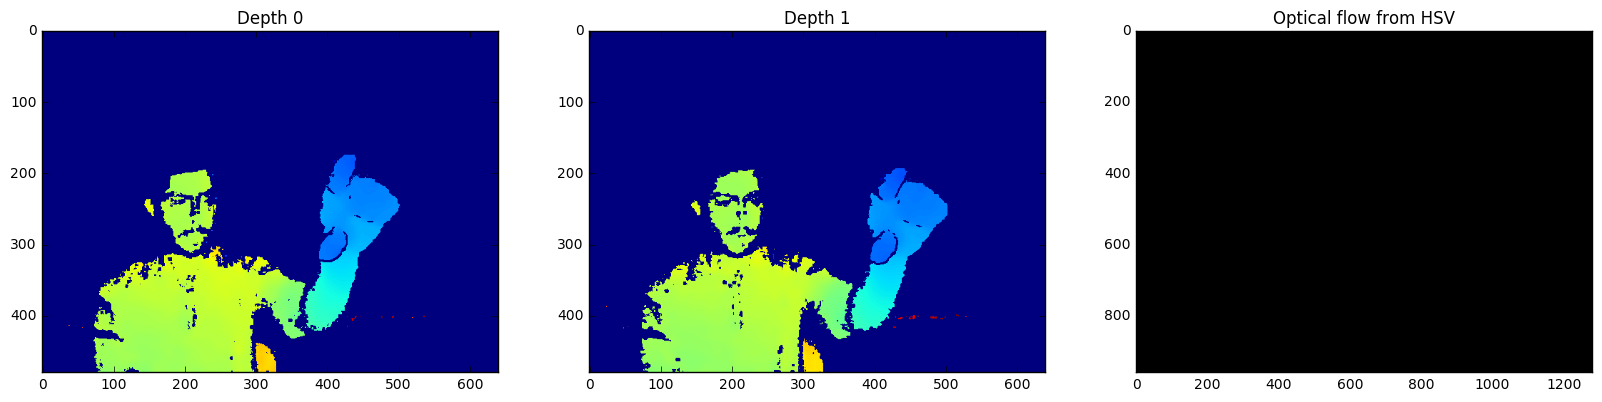

In [44]:
idx_image +=1
print idx_image,"/", skeletons_image.shape[0]
fig = plt.figure(figsize=(20,10))
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(depths[idx_image,:])
a.set_title('Depth 0')
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(depths[idx_image+1,:])
a.set_title('Depth 1')
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(hsvs[idx_image,:])
a.set_title('Optical flow from HSV')

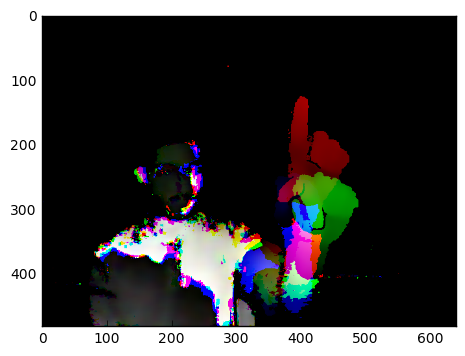

In [70]:
# np.amax(depths) = 1946.0
nb_key_frame = 3

aaaa = np.zeros([480,640,nb_key_frame]).astype(np.float32)
for i in range(nb_key_frame):
#     aaaa[...,i]=65535/np.amax(depths)*depths[int(math.floor(skeletons_image.shape[0]*(1+i)/(nb_key_frame+1))),:]
    aaaa[...,i]=depths[int(math.floor(skeletons_image.shape[0]*(1+i)/(nb_key_frame+1))),:]

# aaaa_mean = np.mean(aaaa,2)
# for i in range(nb_key_frame):
#     aaaa[...,i]=aaaa[...,i]-aaaa_mean
# aaaa_mean2 = np.mean(aaaa,2)

# aaaa_var = np.var(aaaa,2)
# aaaa_grad = np.gradient(aaaa, axis=0)



plt.imshow(aaaa)

In [ ]:
toGrad = np.array([[0, 2, 6], [3, 4, 5]], dtype=np.float)
toGrad

In [ ]:
theGrad = np.gradient(toGrad, axis=0)
theGrad

In [ ]:
min(b.flatten())

In [ ]:
idx_a=int(math.floor(skeletons_image.shape[0]*1/4))
idx_b=int(math.floor(skeletons_image.shape[0]*2/4))
idx_c=int(math.floor(skeletons_image.shape[0]*3/4))

aaaa = np.zeros([480,640,3]).astype(np.uint8)
a = depths[idx_a,:]
b = depths[idx_b,:]
c = depths[idx_c,:]


# a[a==255]=0

aaaa[...,0] = a
aaaa[...,1] = b
aaaa[...,2] = c

aaaa_mean = np.mean(aaaa,2)


fig = plt.figure(figsize=(20,10))
myfig=fig.add_subplot(2,3,1)
imgplot = plt.imshow(a, cmap='gray')
myfig.set_title('Depth 0')
myfig=fig.add_subplot(2,3,2)
imgplot = plt.imshow(b, cmap='gray')
myfig.set_title('Depth 1')
myfig=fig.add_subplot(2,3,3)
imgplot = plt.imshow(c, cmap='gray')
myfig.set_title('Depth 2')


myfig=fig.add_subplot(2,3,4)
imgplot = plt.imshow(aaaa)
myfig.set_title('aaa')

In [9]:
set_file_path='/c16/THESE.JORIS/datasets/HandGestureDataset_SHREC2017/train_gestures.txt'
set_file_path='/c16/THESE.JORIS/datasets/HandGestureDataset_SHREC2017/test_gestures.txt'
list_images = open(set_file_path, 'r').read().splitlines()

In [10]:
import numpy as np
atest = np.loadtxt(set_file_path)

In [83]:
atest[280,:]

array([  6.,   1.,   1.,   1.,   6.,  11.,  99.])

In [26]:
atest.shape

(840, 7)

In [29]:
root_datase = '/c16/THESE.JORIS/datasets/HandGestureDataset_SHREC2017/'
folder_path_canvas = root_datase + 'gesture_{}/finger_{}/subject_{}/essai_{}/'
#id_gesture     id_finger    id_subject    id_essai    14_labels    28_labels    size_sequence
folder_path = folder_path_canvas.format(*[str(int(x)) for x in atest[800,:4]])


In [96]:
label = np.zeros(14); label[int(atest[280,4])-1] = 1.0

In [88]:
label = label[np.newaxis, ...]

In [97]:
batch_label = np.zeros((int(10),14), dtype=np.uint8)

In [98]:
batch_label[5]=label

In [99]:
batch_label

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)